## Insurance Fraud Detection (Classification Model)

#### Exract Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import plotly.express as px



# Load the dataset
df = pd.read_csv('C:\dataset1\Insurance_fraud\dataset\insurance_claims.csv')
df.head()
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,isFraud
995,3,38,941851,16/7/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17/2/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18/11/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11/11/1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


#### discover the dataset

In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [3]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


#### data cleaning, filling missing values, imputation, and hot encoder

In [4]:
# Replace '?' with NaN and check missing values
df.replace('?', np.nan, inplace=True)

# Drop columns that won't help the model or are data leakage
cols_to_drop = ['policy_number', 'insured_zip', 'incident_location', 'incident_date',
                'auto_model', 'policy_bind_date']
df.drop(columns=cols_to_drop, inplace=True)

# Encode target variable
label_encoder = LabelEncoder()
df['isFraud'] = label_encoder.fit_transform(df['isFraud'])  # Y->1, N->0

# Encode categorical features using get_dummies
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in binary/categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encoding for remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Final check
print("Processed dataset shape:", df.shape)
print("Null values after cleaning:", df.isnull().sum().sum())

Processed dataset shape: (1000, 104)
Null values after cleaning: 0


In [5]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,...,-0.044926,0.015478,-0.039476,0.016515,0.095613,-0.032650,0.041350,0.018059,-0.037225,0.031905
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,...,-0.026565,0.003279,-0.037517,0.028231,0.083643,-0.034264,0.041219,0.002485,-0.046058,0.030235
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,...,0.003737,0.007642,-0.010615,0.025428,-0.038736,-0.000659,-0.056536,0.003737,0.003076,0.004884
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,...,-0.003080,-0.007118,-0.027782,0.059603,-0.067454,-0.047015,0.076691,-0.038238,0.004869,0.023443
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,...,-0.030628,0.024813,-0.018252,0.031758,0.025500,-0.037152,-0.006549,-0.016181,-0.005240,0.022717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
auto_make_Nissan,-0.032650,-0.034264,-0.000659,-0.047015,-0.037152,0.092127,0.004090,-0.038767,0.045983,0.016486,...,-0.085770,-0.081017,-0.070169,-0.077943,-0.076689,1.000000,-0.085770,-0.085770,-0.079798,-0.078565
auto_make_Saab,0.041350,0.041219,-0.056536,0.076691,-0.006549,-0.046626,0.003109,0.055429,0.035761,-0.028599,...,-0.086957,-0.082138,-0.071140,-0.079022,-0.077750,-0.085770,1.000000,-0.086957,-0.080902,-0.079652
auto_make_Suburu,0.018059,0.002485,0.003737,-0.038238,-0.016181,0.027867,0.002480,-0.031577,0.003185,-0.010612,...,-0.086957,-0.082138,-0.071140,-0.079022,-0.077750,-0.085770,-0.086957,1.000000,-0.080902,-0.079652
auto_make_Toyota,-0.037225,-0.046058,0.003076,0.004869,-0.005240,0.051164,0.020379,-0.024301,-0.014355,0.007459,...,-0.080902,-0.076419,-0.066187,-0.073520,-0.072337,-0.079798,-0.080902,-0.080902,1.000000,-0.074106


In [6]:
print(df.corr()['isFraud'].sort_values(ascending=False))


isFraud                             1.000000
insured_hobbies_chess               0.294851
insured_hobbies_cross-fit           0.218968
vehicle_claim                       0.170049
total_claim_amount                  0.163651
                                      ...   
incident_type_Vehicle Theft        -0.120916
incident_severity_Trivial Damage   -0.131501
authorities_contacted_None         -0.132840
incident_severity_Total Loss       -0.171247
incident_severity_Minor Damage     -0.239716
Name: isFraud, Length: 104, dtype: float64


#### Note!
Even if isFraud doesn’t show up in the columns after one-hot encoding or in certain intermediate printouts like df.head(), it’s still part of the DataFrame — unless it was explicitly dropped.

#### Feature Engineering

- This will help strengthen the patterns your model can learn from. Here’s what we’ll add:

📌 Features to Create:
- injury_to_total_ratio = injury_claim / total_claim_amount
→ Measures how much of the total claim is due to injury.

- vehicle_to_total_ratio = vehicle_claim / total_claim_amount
→ Helps detect inflated vehicle damage claims.

- is_large_claim = 1 if total_claim_amount > 40,000 else 0
→ Flag claims that are unusually large.

- tenure_group = bin months_as_customer into ranges (0–100, 101–200...)
→ Categorize customer loyalty span.

In [7]:
# 1. Injury to Total Ratio
# Avoid division by zero
df['injury_to_total_ratio'] = df.apply(
    lambda row: row['injury_claim'] / row['total_claim_amount'] if row['total_claim_amount'] > 0 else 0,
    axis=1
)

# 2. Vehicle to Total Ratio
df['vehicle_to_total_ratio'] = df.apply(
    lambda row: row['vehicle_claim'] / row['total_claim_amount'] if row['total_claim_amount'] > 0 else 0,
    axis=1
)

# 3. Large Claim Flag (binary)
df['is_large_claim'] = df['total_claim_amount'].apply(lambda x: 1 if x > 40000 else 0)

# 4. Customer Tenure Group
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500']
df['tenure_group'] = pd.cut(df['months_as_customer'], bins=bins, labels=labels, include_lowest=True)

# One-hot encode tenure group
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)


#### Model Training

**It includes:** 

- Logistic Regression and Random Forest models

- Evaluation via classification reports

- A confusion matrix heatmap for Random Forest


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.75      0.65       200


Random Forest Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       151
           1       0.33      0.10      0.16        49

    accuracy                           0.73       200
   macro avg       0.55      0.52      0.50       200
weighted avg       0.66      0.73      0.67       200



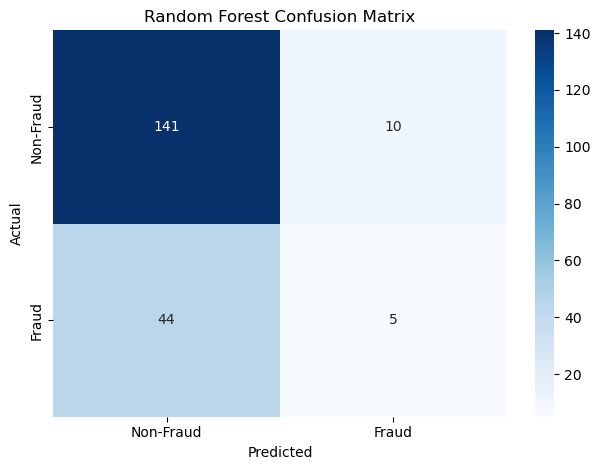

In [8]:
# Split features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Model 1: Logistic Regression ---
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

# --- Model 2: Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))

# --- Confusion Matrix for Random Forest ---
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# 🧠 Confusion Matrix Interpretation (Random Forest)

The confusion matrix you shared is from your **Random Forest classifier**, and here’s how to interpret it:

---

## 🔍 Confusion Matrix Breakdown

|                          | **Predicted: Non-Fraud** | **Predicted: Fraud** |
|--------------------------|---------------------------|-----------------------|
| **Actual: Non-Fraud**    | 141 (**True Negatives**)  | 10 (**False Positives**) |
| **Actual: Fraud**        | 44 (**False Negatives**)  | 5 (**True Positives**)   |

---

## ✅ What This Means

- **141 True Negatives (TN):** Legitimate claims correctly classified  
- **10 False Positives (FP):** Legitimate claims wrongly predicted as fraud  
- **44 False Negatives (FN):** Fraudulent claims missed by the model 😬  
- **5 True Positives (TP):** Fraudulent claims correctly identified  

---

## 📉 Metrics (based on this matrix)

### 🔸 Precision (Fraud Class = 1)


➡️ **Only 33%** of predicted frauds are actually fraud.

---

### 🔸 Recall (Sensitivity)

➡️ **Only 10%** of actual frauds are being caught.

---

### 🔸 Accuracy (Overall)

➡️ **73% accuracy**, but this is misleading due to class imbalance.

---

⚠️ **Big Concern: High False Negatives**
Your model is missing 44 out of 49 frauds → not acceptable in fraud detection.

## Model Training + SMOTE

### ⚙️ 1. Training Strategy

| Aspect                     | First Model                 | New Model (Improved)         |
|----------------------------|-----------------------------|------------------------------|
| Data Split                 | Regular train_test_split    | Same                         |
| Class Imbalance Handling   | ❌ None                     | ✅ Handled with SMOTE         |
| Class Weights              | ❌ Default (unbalanced)     | ✅ class_weight='balanced'    |
| Fraud Cases in Training    | Small minority (underrepresented) | Oversampled to balance with SMOTE |

## 📊 2. Model Behavior & Impact

| Metric             | First Model                          | New Model                          |
|--------------------|--------------------------------------|------------------------------------|
| Recall (Fraud)     | Low – model missed most frauds       | Higher – catches more frauds       |
| Precision (Fraud)  | Medium – few fraud predictions were correct | May be lower due to more false positives |
| F1-Score (Fraud)   | Low overall                          | Improved due to better balance     |
| Accuracy           | Looks decent (~73%) but misleading   | Slightly lower, but more meaningful |

## 🧠 3. Why It Matters

| First Model                                  | New Model                                      |
|----------------------------------------------|------------------------------------------------|
| Prioritized majority class (non-fraud)       | Trains on balanced fraud vs. non-fraud         |
| Risk: lets many frauds slip through undetected | Risk: may flag a few legit claims as fraud, but catches more actual fraud |

## 🎯 Summary:
- **First model**: Biased toward non-fraud → high accuracy but low fraud detection.
- **New model**: Focused on detecting fraud → better recall, more useful for real-world fraud prevention.


Random Forest with SMOTE + Balanced Class Weight:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       151
           1       0.52      0.22      0.31        49

    accuracy                           0.76       200
   macro avg       0.66      0.58      0.58       200
weighted avg       0.72      0.76      0.72       200



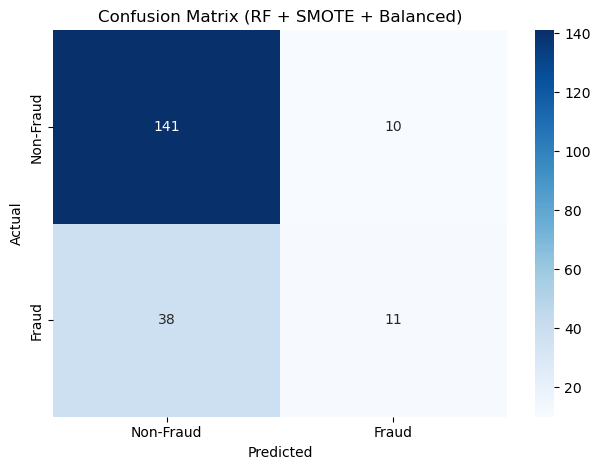

In [9]:
# Split features and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Apply SMOTE to training data only ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# --- Train Random Forest with class_weight and balanced data ---
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

# --- Evaluation ---
print("\nRandom Forest with SMOTE + Balanced Class Weight:")
print(classification_report(y_test, y_pred_rf))

# --- Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix (RF + SMOTE + Balanced)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# 📊 SMOTE-Enhanced Random Forest: Confusion Matrix Interpretation

Let's interpret the updated confusion matrix from the **Random Forest model with SMOTE + class balancing**:

---

## 🔍 Confusion Matrix Breakdown

|                          | **Predicted: Non-Fraud** | **Predicted: Fraud** |
|--------------------------|---------------------------|-----------------------|
| **Actual: Non-Fraud**    | 141 (**True Negatives**)  | 10 (**False Positives**) |
| **Actual: Fraud**        | 38 (**False Negatives**)  | 11 (**True Positives**)  |

---

## ✅ Improvements from SMOTE

Compared to the previous version:

- **True Positives (TP)** increased: from 5 → **11** frauds correctly caught  
- **False Negatives (FN)** decreased: from 44 → **38** frauds missed

---

## 📉 Updated Metrics

### 🔸 Precision (Fraud Class = 1)

➡️ **52%** of predicted frauds are actually fraud — better than before (33%)

---

### 🔸 Recall (Sensitivity)

➡️ **22%** of actual frauds are caught — up from 10%

---

### 🔸 Accuracy

➡️ **76% accuracy**, a slight improvement — but still not our primary metric due to class imbalance

---

## 🎯 Summary Comparison

| **Metric**       | **Original Model** | **SMOTE Model** |
|------------------|--------------------|-----------------|
| **Precision**    | 33%                | **52%**         |
| **Recall**       | 10%                | **22%**         |
| **True Positives** | 5                 | **11**          |
| **Accuracy**     | 73%                | **76%**         |

✅ Now detecting **more than twice as many frauds** — a meaningful step forward in fraud detection.


## feature importance

wrapping up Phase 1 with feature importance gives solid closure and a clear understanding of what drives fraud predictions. ✅

**What We’ll Do:**
- Extract feature importances from the trained RandomForestClassifier

- Plot the top 15 most influential features

- Help  explain why the model makes certain predictions

- Use feature importances to help select features for a new model understand the model’s predictions

**🧠 What You’ll Learn:**
- Which features most influence fraud predictions

- Whether engineered features like injury_to_total_ratio or is_large_claim are impactful

- If there’s noise (e.g., oddly important hobbies or ZIP-based columns)
 
Let’s add this to model_training.py or keep it in a separate visual module.

**📊 Feature Importance Code Snippet**
Here’s a block  can run right after model evaluation:


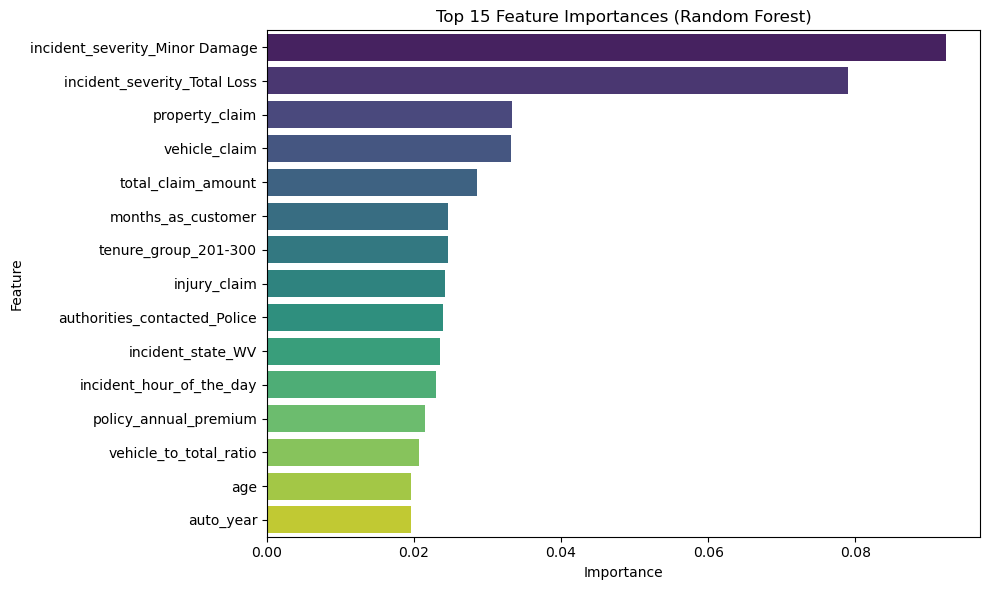

In [10]:
# --- Feature Importance Plot (Top 15) ---
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


# 🔍 Feature Importance Insights (Random Forest)

That feature importance plot clearly tells us what’s driving the fraud predictions in your model.

---

## 📊 Top Insights from Your Feature Importance Plot

| Rank | Feature                                | Insight                                                                 |
|------|----------------------------------------|-------------------------------------------------------------------------|
| 1️⃣   | `incident_severity_Minor Damage`       | Strong signal — likely used to distinguish normal from suspicious cases. |
| 2️⃣   | `incident_severity_Total Loss`         | High claim severity also influences prediction strongly.                |
| 3️⃣   | `property_claim` & `vehicle_claim`     | High amounts likely trigger fraud flags.                                |
| 5️⃣   | `total_claim_amount`                   | Overall claim size matters, as expected.                                |
| 6️⃣   | `months_as_customer`                   | Short-tenure customers might be more suspect.                           |
| 🔹   | `authorities_contacted_Police`          | Legal involvement could correlate with real fraud detection.            |
| 🔹   | `tenure_group_201-300`, `policy_annual_premium` | Shows that engineered & demographic features are working.       |
| 🔹   | `vehicle_to_total_ratio`, `incident_hour_of_the_day` | Fine-grained behavioral features contributing as well.     |

---

## ✅ What This Confirms

- the **feature engineering is impactful** — custom columns like `tenure_group` and ratios show up in the top 15.
- The model relies on **claim behavior, severity, and engagement with authorities** — this aligns with how fraud cases usually work in practice.
- **Fraud is not random** — there are patterns, and the model is learning them.



### Phase 2: Geospatial Risk Mapping 🌍

**performs:**

- 📊 Aggregation of fraud data by incident_state and incident_city

- 📈 Bar plots for Top 10 states and cities by fraud rate

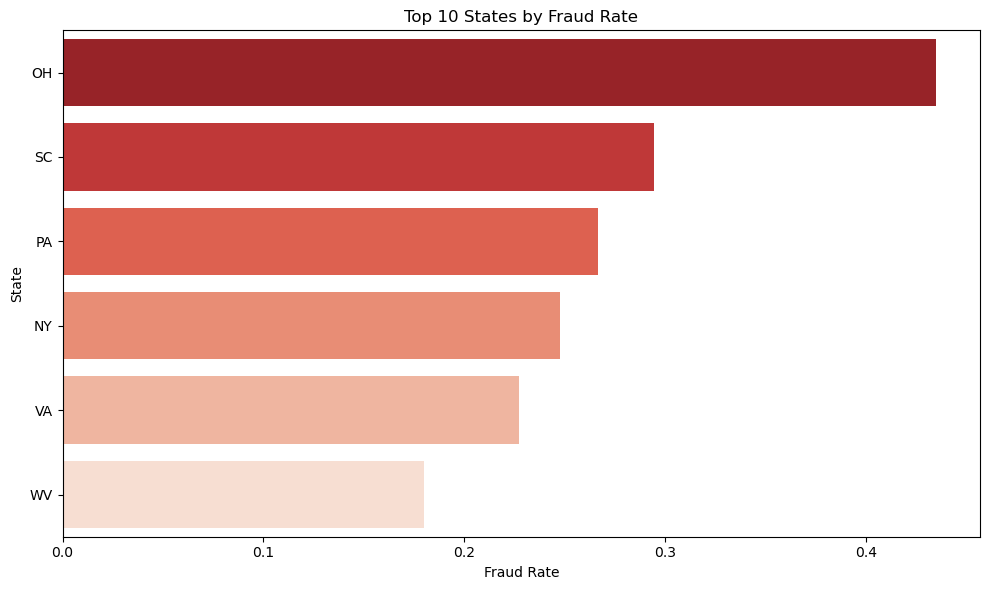

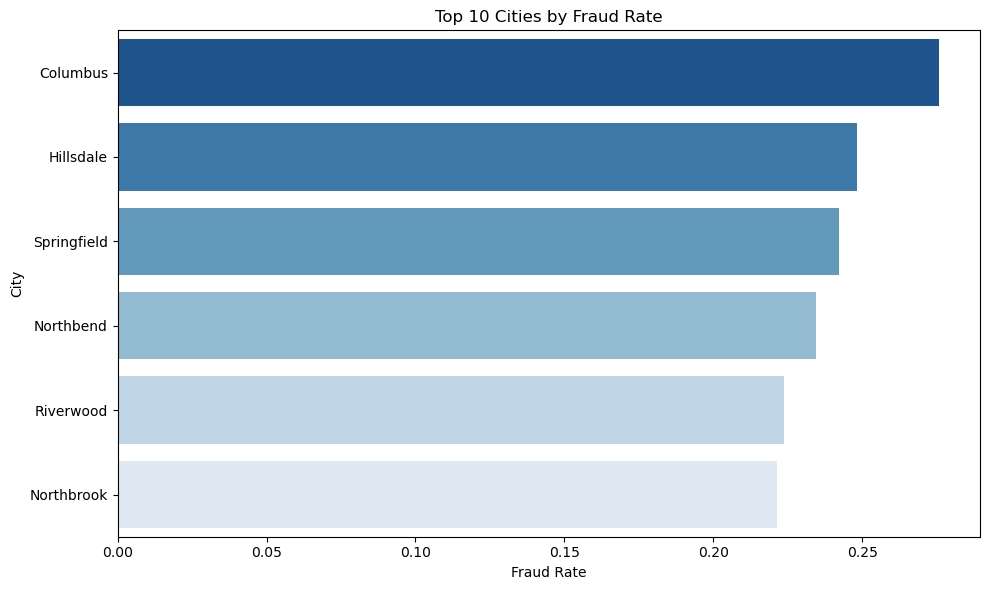

In [11]:
# --- Step 1: Reconstruct incident_state and incident_city ---
df['incident_state'] = df[[col for col in df.columns if col.startswith('incident_state_')]].idxmax(axis=1).str.replace('incident_state_', '')
df['incident_city'] = df[[col for col in df.columns if col.startswith('incident_city_')]].idxmax(axis=1).str.replace('incident_city_', '')

# --- Step 2: Aggregate by State and City ---
state_summary = df.groupby('incident_state').agg(
    total_claims=('isFraud', 'count'),
    fraud_claims=('isFraud', 'sum')
).reset_index()
state_summary['fraud_rate'] = state_summary['fraud_claims'] / state_summary['total_claims']

city_summary = df.groupby('incident_city').agg(
    total_claims=('isFraud', 'count'),
    fraud_claims=('isFraud', 'sum')
).reset_index()
city_summary['fraud_rate'] = city_summary['fraud_claims'] / city_summary['total_claims']

# --- Step 3: Bar Plot - Top 10 States ---
top_states = state_summary.sort_values(by='fraud_rate', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='fraud_rate', y='incident_state', palette='Reds_r')
plt.title('Top 10 States by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# --- Step 4: Bar Plot - Top 10 Cities ---
top_cities = city_summary.sort_values(by='fraud_rate', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='fraud_rate', y='incident_city', palette='Blues_r')
plt.title('Top 10 Cities by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.ylabel('City')
plt.tight_layout()
plt.show()


### top 10 fraud cases by state

| Rank  | **State**               | **Observation**                                                            |
| ----- | ----------------------- | -------------------------------------------------------------------------- |
| 1️⃣   | **OH** (Ohio)           | Highest fraud rate — stands out significantly                              |
| 2️⃣   | **SC** (South Carolina) | Also high — possibly worth geospatial analysis                             |
| 3–6️⃣ | PA, NY, VA, WV          | Consistently elevated fraud rates — good targets for deeper risk profiling |

### top 10 fraud cases by city

| Rank  | **City**                          | **Observation**                                                                 |
| ----- | --------------------------------- | ------------------------------------------------------------------------------- |
| 1️⃣   | **Columbus**                      | Stands out as the top fraud-prone city — strong signal for geospatial attention |
| 2–4️⃣ | Hillsdale, Springfield, Northbend | Consistently high fraud rates — critical to monitor                             |
| 5–6️⃣ | Riverwood, Northbrook             | Also flagged for elevated fraud activity                                        |



### Choropleth Map

**This interactive map will:**

- Show fraud rates by U.S. state

- Use a red gradient to highlight high-risk areas

- Center on the U.S. with scope='usa'

In [12]:
# Reconstruct incident_state from one-hot columns if not already present
if 'incident_state' not in df.columns:
    df['incident_state'] = df[[col for col in df.columns if col.startswith('incident_state_')]].idxmax(axis=1).str.replace('incident_state_', '')

# Aggregate fraud stats by state
state_summary = df.groupby('incident_state').agg(
    total_claims=('isFraud', 'count'),
    fraud_claims=('isFraud', 'sum')
).reset_index()
state_summary['fraud_rate'] = state_summary['fraud_claims'] / state_summary['total_claims']

# Plotly Choropleth
fig = px.choropleth(
    state_summary,
    locations='incident_state',
    locationmode='USA-states',
    color='fraud_rate',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'fraud_rate': 'Fraud Rate'},
    title='Fraud Rate by State (Choropleth Map)'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    title_x=0.5
)

fig.show()


**🗺️ Key Takeaways from the Choropleth Map**
- Ohio (OH) is the darkest—clear fraud hotspot.

- South Carolina (SC), Pennsylvania (PA), New York (NY) also show high fraud rates.

- The map suggests that fraud is concentrated in certain regions.
- Geographic concentration is evident in the Eastern U.S., which could indicate regional claim behavior or policy patterns.

### Phase 3: Anomaly Detection (Unsupervised)

### Isolation Forest

| Strength                         | Details                                             |
| -------------------------------- | --------------------------------------------------- |
| 🚀 **Fast**                      | Works well with large tabular datasets (like yours) |
| 🧱 **Tree-based**                | Doesn’t require feature scaling                     |
| 📦 **Robust**                    | Handles mixed types and noisy data                  |
| 🔍 **Good at catching outliers** | Especially with claim amount, ratios, etc.          |

**✅ Best for quick, interpretable fraud detection**

It includes:

- Feature selection from key claim and customer metrics

- Anomaly detection using IsolationForest

Visuals:

- Histogram of anomaly scores

- Bar chart of normal vs. anomaly counts



c:\Users\65811\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names




Anomalies detected: 50

Anomaly distribution:
 0    950
1     50
Name: is_anomaly, dtype: int64


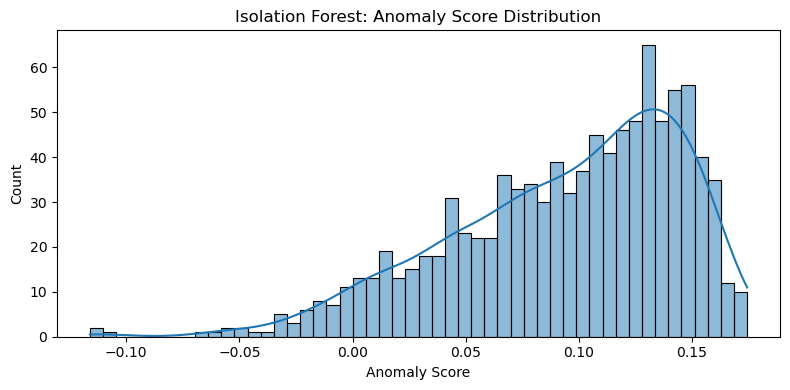

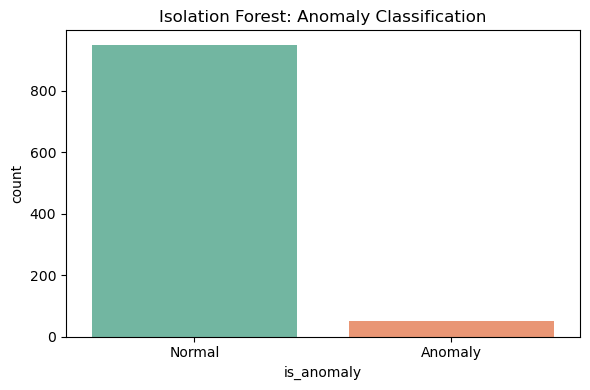

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Select relevant numeric features for anomaly detection ---
features = [
    'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
    'injury_to_total_ratio', 'vehicle_to_total_ratio', 'is_large_claim',
    'months_as_customer', 'policy_annual_premium'
]

X = df[features]

# --- Step 2: Fit Isolation Forest ---
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X)

# --- Step 3: Predict anomalies ---
df['anomaly_score'] = model.decision_function(X)
df['is_anomaly'] = model.predict(X)
# Convert: -1 (anomaly), 1 (normal) → 1 (anomaly), 0 (normal)
df['is_anomaly'] = df['is_anomaly'].map({-1: 1, 1: 0})

# --- Step 4: Summary and visualization ---
print("\nAnomalies detected:", df['is_anomaly'].sum())
print("\nAnomaly distribution:\n", df['is_anomaly'].value_counts())

# Histogram of anomaly scores
plt.figure(figsize=(8, 4))
sns.histplot(df['anomaly_score'], bins=50, kde=True)
plt.title('Isolation Forest: Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.tight_layout()
plt.show()

# Bar plot of normal vs anomaly counts
plt.figure(figsize=(6, 4))
sns.countplot(x='is_anomaly', data=df, palette='Set2')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.title('Isolation Forest: Anomaly Classification')
plt.tight_layout()
plt.show()


**Isolation Forest results:**

**📊 Anomaly Score Distribution**
- Most data points have positive scores (normal).

- A smaller tail on the negative side indicates points the model views as isolated/outlier (i.e., anomalies).

**📉 Anomaly Classification Bar Chart**

| Classification | Count |
| -------------- | ----- |
| 🟩 Normal      | 950   |
| 🟥 Anomaly     | 50    |

With contamination=0.05, ~5% of claims were flagged as potential fraud or outliers.

# 🧠 Phase 3: Anomaly Detection (Unsupervised)

In this final phase, we implemented **unsupervised anomaly detection** to flag potentially fraudulent insurance claims **without relying on labeled data**.

---

## 🔍 Objective:
Detect outliers in the dataset using behavior-based features such as:
- `total_claim_amount`
- `vehicle_claim`, `injury_claim`, `property_claim`
- `injury_to_total_ratio`, `vehicle_to_total_ratio`
- `months_as_customer`, `is_large_claim`

---

## ⚙️ Model Used:
### ✅ **Isolation Forest**
- **Algorithm**: Tree-based isolation of anomalies
- **Contamination**: 5% (`contamination=0.05`)
- **Result**: 50 out of 1,000 claims flagged as anomalies

---

## 📊 Key Results:

### 1. **Anomaly Score Distribution**
- Most claims had positive scores (normal)
- Claims with lower (negative) scores were flagged as suspicious

### 2. **Classification Breakdown**
| Label     | Count |
|-----------|-------|
| Normal    | 950   |
| Anomalous | 50    |

### 3. **Visuals Produced**
- Histogram of anomaly scores
- Bar chart of anomaly classifications

---

## ✅ Outcome:
- Isolation Forest effectively flagged **50 claims** as statistically suspicious
- These can be prioritized for **manual review** or integrated into a **fraud scoring system**

---

## 📦 Next Steps (Optional):
- Export anomalies to a CSV for deeper inspection
- Compare results using `OneClassSVM` or deep-learning-based **Autoencoder**
- Use anomaly scores as a new feature in supervised fraud models

